In [6]:
import torch

In [7]:
import pickle  #오염된 이미지 파일을 로딩하는 라이브러리

In [8]:
import matplotlib.pyplot as plt


In [9]:
broken_image = torch.FloatTensor(pickle.load(open('broken_image_t.p', 'rb'),encoding ='latin1'))

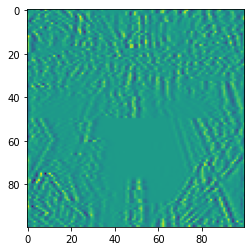

In [10]:
plt.imshow(broken_image.view(100,100))

In [11]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [12]:
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)  #dist는 두 텐서 사이의 거리를 구하는 함수 


In [13]:
random_tensor = torch.randn(10000, dtype = torch.float)

Loss at 0 = 12.155996322631836
Loss at 1000 = 1.1887176036834717
Loss at 2000 = 0.5662330389022827
Loss at 3000 = 0.387909471988678
Loss at 4000 = 0.30394163727760315
Loss at 5000 = 0.25323888659477234
Loss at 6000 = 0.2174447923898697
Loss at 7000 = 0.18939638137817383
Loss at 8000 = 0.1658424586057663
Loss at 9000 = 0.1451088786125183
Loss at 10000 = 0.12624570727348328
Loss at 11000 = 0.10867603868246078
Loss at 12000 = 0.09203290194272995
Loss at 13000 = 0.07607535272836685
Loss at 14000 = 0.06064217910170555
Loss at 15000 = 0.04562532901763916
Loss at 16000 = 0.030951783061027527
Loss at 17000 = 0.0211465023458004
Loss at 18000 = 0.02116495743393898
Loss at 19000 = 0.021167153492569923


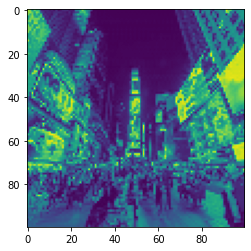

In [14]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
plt.imshow(random_tensor.view(100,100).data)

In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p' , 'rb'), encoding='latin1'))

#plt.imshow(broken_image.view(100,100))

def weird_function(x, n_iter=5):
  h = x
  filt = torch.tensor([-1./3, 1./3, -1/.3])
  for i in range(n_iter):
    zero_tensor = torch.tensor([1.0*0])
    h_1 = torch.cat((zero_tensor, h[:-1]), 0)
    h_r = torch.cat((h[1:], zero_tensor), 0)
    h = filt[0] * h + filt[2] * h_1 + filt[1] * h_r
    if i % 2 == 0:
      h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
  return h

def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype=torch.float)
print(random_tensor)

lr = 0.8

for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()

  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)

